### TECH-DA104-4 / Assess 3     
#### Python Unit Summary Exercise - Analyze Titanic data 
---
Yui Hanamura / student No: 24904



* Introduction    
In this unit summary, we will analyze the Titanic data and see if there is a correlation between the chances of survival and certain characteristics of each passenger (gender, cabin class, ticket price, etc.)

1. Import the required libraries to the notebook

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Import the titanic.csv data file into the notebook.

In [41]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


3. Using the methods we learned, get to know the df: 


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Check for missing data in the columns 

In [43]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


* If there is missing data, does it make sense for these columns to have missing data?    
   How much data is missing?       
   And will the lack of data affect the analysis? 

   Answer: 


|column name|Null|Action|Reason|
|:----:|:----:|:----:|:----|
|Age|177|need|Factors affecting survival|
|Cabin|687|delete|A lot of NULL|
|Embarked|2|both|Little loss but impact of embarkation site unknown|


4. Delete the cabin column from the df

In [44]:
df.drop(columns=['Cabin'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


5. Update the missing values in the age column, for women, use the median value of all female passengers 

In [45]:
female_median_age = df[df['Sex'] == 'female']['Age'].median()
female_median_age
print(f"Males Age mean is {female_median_age}.")

print(f"Unique values in the 'Sex' column: {df['Sex'].unique()}")
# Confirm column name

print(f"The 'Age' column has {df['Age'].isnull().sum()} missing values.")
# Comfirm female number


Males Age mean is 27.0.
Unique values in the 'Sex' column: ['male' 'female']
The 'Age' column has 177 missing values.


In [46]:
df.loc[(df['Sex'] == 'female') & (df['Age'].isnull()), 'Age'] = female_median_age
print(df['Age'].isnull().sum())
print(f"Missing values for females in the 'Age' column were filled with the mean value:\nFor now, the 'Age' column has {df['Age'].isnull().sum()} missing values.")


124
Missing values for females in the 'Age' column were filled with the mean value:
For now, the 'Age' column has 124 missing values.


6. Update the missing values in the age column for men, use the median value of all male passengers 

In [47]:
male_median_age = df[df['Sex'] == 'male']['Age'].median()
male_median_age
print(f"Males Age mean is {male_median_age}.")

Males Age mean is 29.0.


In [48]:

df.loc[(df['Sex'] == 'male') & (df['Age'].isnull()), 'Age'] = male_median_age

print(f"""Missing values for males in the 'Age' column were filled with the mean value:
For now, the 'Age' column has {df['Age'].isnull().sum()} missing values.""")
# print(df['Age'].isnull().sum())


Missing values for males in the 'Age' column were filled with the mean value:
For now, the 'Age' column has 0 missing values.


7. Fill in the missing value in the embarked column with the most commonly appearing  value (the most repeated value in this column) 

In [49]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [50]:
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [51]:
# Fill missing values in 'Embarked' with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print(f"Missing values in 'Embarked' column were filled with the most common value: {df['Embarked'].mode()[0]}.")

print(df['Embarked'].value_counts())
print(f"'Embarked' column is added 2 (644 -> 646).")


Missing values in 'Embarked' column were filled with the most common value: S.
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
'Embarked' column is added 2 (644 -> 646).


C:\Users\hanay\AppData\Local\Temp\ipykernel_25272\2336863755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


8. Create a chart to show the distribution of passengers by gender.   
Choose a chart that suits you best, and design it so it is clear and presentable. 

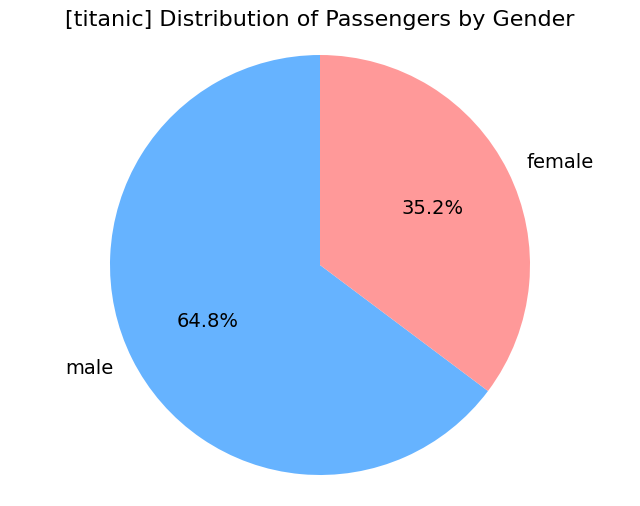

In [52]:
plt.figure(figsize=(8, 6))
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#66b3ff','#ff9999'],
        textprops={'fontsize': 14} )
plt.title('[titanic] Distribution of Passengers by Gender', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

9. Create a chart to show the distribution of passengers by gender (Sex) and whether they survived (Survived)

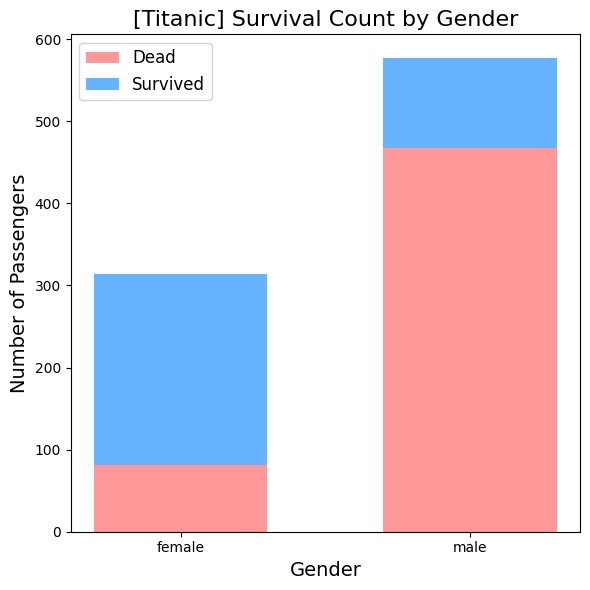

In [53]:
grouped = df.groupby(['Sex', 'Survived']).size().unstack()
# Group by sex and survived status
plt.figure(figsize=(6, 6))

x = np.arange(len(grouped.index))
# dead
plt.bar(grouped.index, 
        grouped[0], 
        label='Dead', 
        color='#ff9999',
        width=0.6)

# survived stacked on top of dead
plt.bar(grouped.index, 
        grouped[1], 
        bottom=grouped[0], 
        label='Survived', 
        color='#66b3ff',
        width=0.6)

plt.xticks(x, grouped.index)
plt.title('[Titanic] Survival Count by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

 

10. Use a displot chart to view the age distribution of passengers by age. Follow 
these guidelines:   
* Separate it into two charts according to the values in the gender column
* Within each chart, split the data into series according to the data in the survived column 
* Set the display so that the data is stacked 


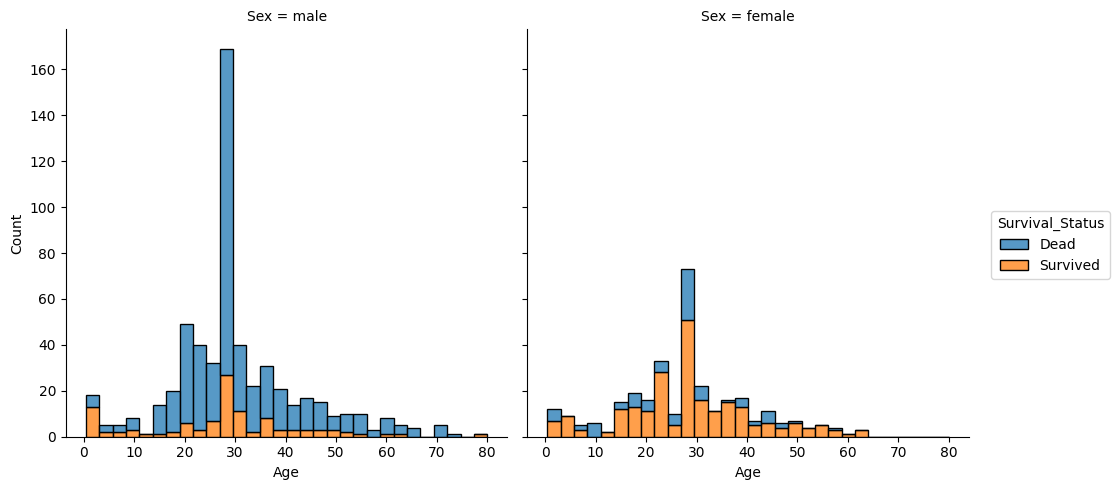

In [54]:
df['Survival_Status'] = df['Survived'].map({0: 'Dead', 1: 'Survived'})
# Define 'Survival_Status'
g = sns.displot(
    data = df,
    x = 'Age',
    hue = 'Survival_Status',
    multiple = 'stack',
    kind = 'hist',
    col = 'Sex'
)
g._legend.set_frame_on(True)

11. Now, examine whether there is a correlation between the different columns.   
* To do this, select only the columns that have meaning (for example, the number of clients can vary, but this figure has no effect on the results of the analysis)  

**I choose 'Age' and 'Survived'.**

In [55]:
corr = df[['Age', 'Survived']].corr()
print(corr)

               Age  Survived
Age       1.000000 -0.073296
Survived -0.073296  1.000000


Answer:     
*-0.077, so there is a weak negative correlation.*     
*I read that as age increases, survival tends to decrease slightly.*


* Create a correlation table by applying the corr () method to the data. Save the result in a variable named corr_mtx

In [56]:
corr_mtx = df.corr(numeric_only=True)
print(corr_mtx)
# Age and Survived

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.035734 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.073296 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.338056  0.083081  0.018443   
Age             0.035734 -0.073296 -0.338056  1.000000 -0.236376 -0.176038   
SibSp          -0.057527 -0.035322  0.083081 -0.236376  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.176038  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.094161  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.094161  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


* Create a heatmap chart that will run on the correlation table data, and design it as you wish

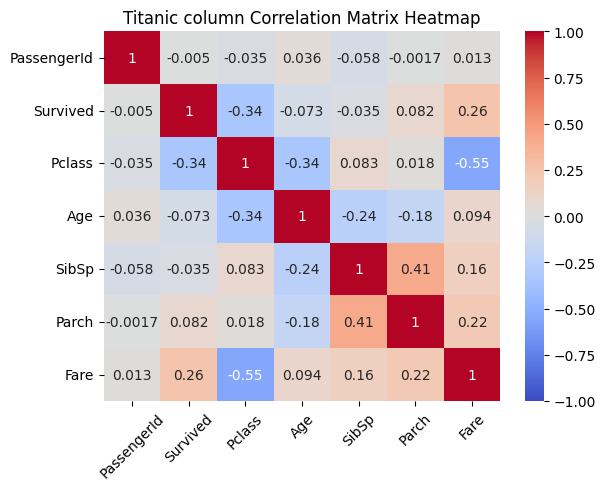

In [57]:
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.title("Titanic column Correlation Matrix Heatmap")
plt.show()

* Is there a strong positive correlation (values close to 1) or a negative correlation (values close to 1-) between any of the columns? 

In [58]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Dead
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Dead
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Survived
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,Dead
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Survived


Answer:
**Positive correlation**   
Between 'Parch' and 'SibSp' has 0.41   
   

**Negative correlation**    
Between 'Fare' and 'Pclass' has -0.55

However, this correlation test uses only numerical data, so incorporating categorical variables would improve accuracy.  
Need to consider other column (ex. Sex, Name)



---
## Part 2 - Continued Analysis 
12. Define 3 research questions that will help us find out who has a high chance of surviving, and then answer the questions you have defined

### [Q1] Is there a relationship between title and age?

In [59]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [60]:
# "Braund, Mr. Owen Harris" → "Mr"
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'].info()
df['Title'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Title
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [61]:
# Calculate the average age for each title (excluding NaN)
title_stats = df.groupby('Title')['Age'].agg(['mean', 'count'])
title_stats.columns = ['Age_Mean', 'Count'] 
title_stats


,Age_Mean,Count
Title,,
Capt,70.000000,1
Col,58.000000,2
Don,40.000000,1
Dr,40.142857,7
Jonkheer,38.000000,1
Lady,48.000000,1
Major,48.500000,2
Master,7.016750,40
Miss,22.807692,182


|Title|Meaning/Description|Average Age|Count|Notes|
|:----|:----|:----|:----|:----|
|Capt|Captain (ship captain or military captain)|~70|1|Older, likely a military officer or ship captain|
|Col|Colonel (military rank)|~58|2|Senior military officer, mostly men|
|Don|Spanish honorific for men|~40|1|Noble or high-status male|
|Dr|Doctor or PhD|~40|7|Professionals, mixed genders|
|Jonkheer|Dutch noble title|~38|1|Noble rank, very few people|
|Lady|Female noble title|~48|1|Noblewoman|
|Major|Military rank (Major)|~48.5|2|Mid-level military officer, men|
|Master|Young boys|~7|40|Used for boys, usually under 13|
|Miss|Unmarried females (girls and women)|~22.8|182|Mostly young women and girls|
|Mlle|French for Miss (unmarried woman)|~24|2|Rare, can be merged with "Miss"|
|Mme|French for Mrs (married woman)|~24|1|Rare, can be merged with "Mrs"|
|Mr|Adult males|~31.6|517|The largest group|
|Mrs|Married women|~34.7|125|Adult married women|
|Ms|Female, marital status unknown|~28|1|Used when marital status unclear; similar to "Miss" or "Mrs"|
|Rev|Reverend (clergy)|~43|6|Religious clergy|
|Sir|Knight (noble title)|~49|1|Male noble|
|the Countess|Female noble title (Countess)|~33|1|Female noble|

(Answer by ChatGPT)

In [62]:
# Categorized by title
def simplify_title(title):
    if title == 'Mr':
        return 'Mr'
    elif title in ['Mrs', 'Mme']:
        return 'Mrs'
    elif title in ['Miss', 'Mlle', 'Ms']:
        return 'Miss'
    elif title == 'Master':
        return 'Master'
    elif title in ['Capt', 'Col', 'Major']:
        return 'Military'
    elif title in ['Don', 'Lady', 'Sir', 'Jonkheer', 'the Countess']:
        return 'Noble'
    elif title == 'Rev':
        return 'Clergy'
    elif title == 'Dr':
        return 'Doctor'
    else:
        return 'Other'

df['Title_Simple'] = df['Title'].apply(simplify_title)

df['Title_Simple'].value_counts()

Title_Simple
Mr          517
Miss        185
Mrs         126
Master       40
Doctor        7
Clergy        6
Noble         5
Military      5
Name: count, dtype: int64

In [63]:
df['Title_Simple'] = df['Title'].apply(simplify_title)
df[['Title', 'Title_Simple']].head()


,Title,Title_Simple
0,Mr,Mr
1,Mrs,Mrs
2,Miss,Miss
3,Mrs,Mrs
4,Mr,Mr


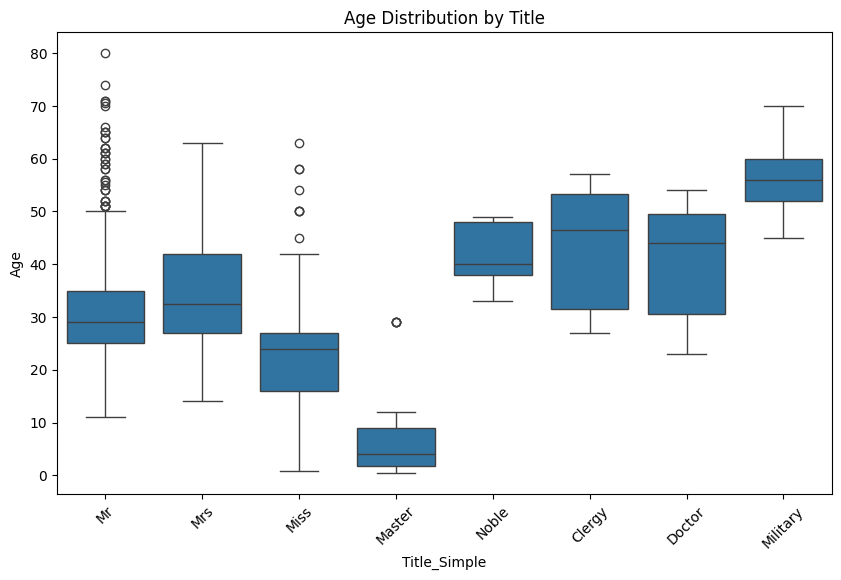

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Title_Simple', y='Age')
plt.xticks(rotation=45)
plt.title('Age Distribution by Title')

plt.show()

---
### [Q2] Are there differences in survival rates based on age by title, gender?

In [65]:
# Recalculating the average age by title
title_simple_stats = df.groupby('Title_Simple')['Age'].agg(['mean', 'count']).sort_values('count', ascending=False)
title_simple_stats.columns = ['Age_Mean', 'Count']
print(title_simple_stats)

               Age_Mean  Count
Title_Simple                  
Mr            31.592843    517
Miss          22.848649    185
Mrs           34.603175    126
Master         7.016750     40
Doctor        40.142857      7
Clergy        43.166667      6
Military      56.600000      5
Noble         41.600000      5


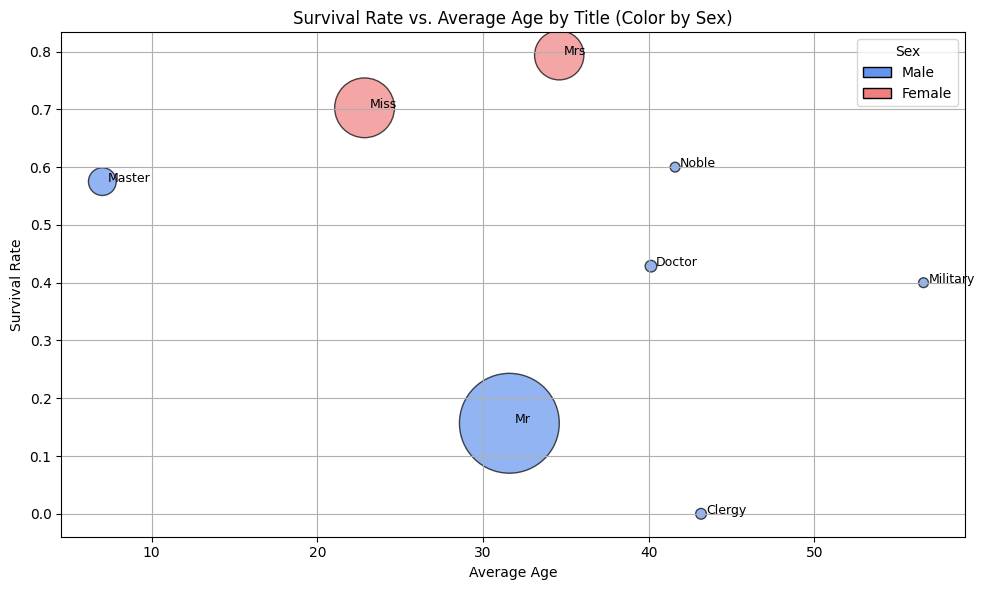

In [66]:
title_sex = df.groupby('Title_Simple')['Sex'].agg(lambda x: x.mode()[0])

# Agg: Title_Simple per count, survive, number of person
title_stats = df.groupby('Title_Simple').agg({
    'Age': 'mean',
    'Survived': 'mean',
    'PassengerId': 'count'
}).rename(columns={
    'Age': 'Age_Mean',
    'Survived': 'Survival_Rate',
    'PassengerId': 'Count'
})

# Merge the title stats with the representative
title_stats['Sex'] = title_stats.index.map(title_sex)

# Define colors based on sex
color_map = {'male': 'cornflowerblue', 'female': 'lightcoral'}
colors = title_stats['Sex'].map(color_map)

# bobble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    title_stats['Age_Mean'],
    title_stats['Survival_Rate'],
    s=title_stats['Count'] * 10,
    c=colors,
    alpha=0.7,
    edgecolors='black'
)

# A process to display the "title name (Mr, Miss, etc.)" next to each bubble in a scatter plot
for title, row in title_stats.iterrows():
    plt.text(row['Age_Mean'] + 0.3, row['Survival_Rate'], title, fontsize=9)

plt.xlabel('Average Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate vs. Average Age by Title (Color by Sex)')
plt.grid(True)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='cornflowerblue', edgecolor='black', label='Male'),
                   Patch(facecolor='lightcoral', edgecolor='black', label='Female')]
plt.legend(handles=legend_elements, title='Sex')

plt.tight_layout()
plt.show()


High survival rate for women. Zero survival rate for clergy.

---


In [67]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival_Status,Title,Title_Simple
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Dead,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Dead,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Dead,Rev,Clergy
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Survived,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,Dead,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Survived,Mr,Mr


In [68]:
df[['Pclass', 'Fare']]

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


---
### [Q3] Does the survival rate differ depending on the room (including fare)?   


It is predicted that groups of family and friends will be in the same cabin class or have similar ticket numbers.   
Even in the same third-class cabin, fares vary depending on location and size.

In [69]:
# STEP1 : Group by same ticket ID
df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [ ]:
# Count PassengerId and save as GroupSize
df['GroupSize'] = df.groupby('Ticket')['Ticket'].transform('count')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival_Status,Title,Title_Simple,GroupSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Dead,Mr,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived,Mrs,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived,Miss,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived,Mrs,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Dead,Mr,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Dead,Rev,Clergy,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Survived,Miss,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,Dead,Miss,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Survived,Mr,Mr,1


In [71]:
# STEP2: Cariculate the average fare for each group
df['Fare_per_person'] = df['Fare'] / df['GroupSize']
df[['Ticket', 'Pclass', 'Fare', 'GroupSize', 'Fare_per_person']].head(10)

,Ticket,Pclass,Fare,GroupSize,Fare_per_person
0,A/5 21171,3,7.2500,1,7.25000
1,PC 17599,1,71.2833,1,71.28330
2,STON/O2. 3101282,3,7.9250,1,7.92500
3,113803,1,53.1000,2,26.55000
4,373450,3,8.0500,1,8.05000
5,330877,3,8.4583,1,8.45830
6,17463,1,51.8625,1,51.86250
7,349909,3,21.0750,4,5.26875
8,347742,3,11.1333,3,3.71110
9,237736,2,30.0708,2,15.03540


In [72]:
# STEP3: Fare_per_person is ranked into three levels within the same Pclass
df['Fare_Level'] = df.groupby('Pclass')['Fare_per_person'].transform(
    lambda x: pd.qcut(x, q=3, labels=['Low', 'Mid', 'High'])
)
df[['Pclass', 'Fare_per_person', 'Fare_Level']].head(10)

,Pclass,Fare_per_person,Fare_Level
0,3,7.25000,Low
1,1,71.28330,High
2,3,7.92500,Mid
3,1,26.55000,Low
4,3,8.05000,High
5,3,8.45830,High
6,1,51.86250,High
7,3,5.26875,Low
8,3,3.71110,Low
9,2,15.03540,High


C:\Users\hanay\AppData\Local\Temp\ipykernel_25272\1403183830.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = df.groupby(['Pclass', 'Fare_Level'])['Survived'].mean().unstack()


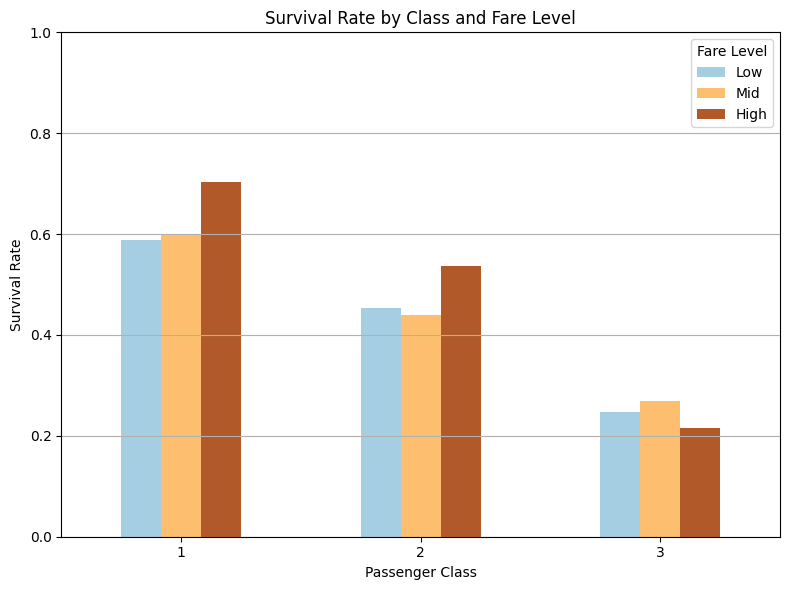

In [88]:
# STEP4: Illustrate the bar chart
survival_by_fare = df.groupby(['Pclass', 'Fare_Level'])['Survived'].mean().unstack()

survival_by_fare.plot(kind='bar', 
                      figsize=(8, 6), 
                      colormap='Paired',
                      rot=0)
plt.title('Survival Rate by Class and Fare Level')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Fare Level')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Higher fares also have a higher survival rate in first and second class cabins.**

#### Plotting survival rate by Pclass, Fare Level, and Sex

C:\Users\hanay\AppData\Local\Temp\ipykernel_25272\2493154526.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Pclass', 'Fare_Level', 'Sex'])['Survived'].mean().reset_index()
C:\Users\hanay\AppData\Local\Temp\ipykernel_25272\2493154526.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(
C:\Users\hanay\AppData\Local\Temp\ipykernel_25272\2493154526.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1st', '2nd', '3rd'])
C:\Users\hanay\AppData\Local\Temp\ipykernel_25272\2493154526.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLo

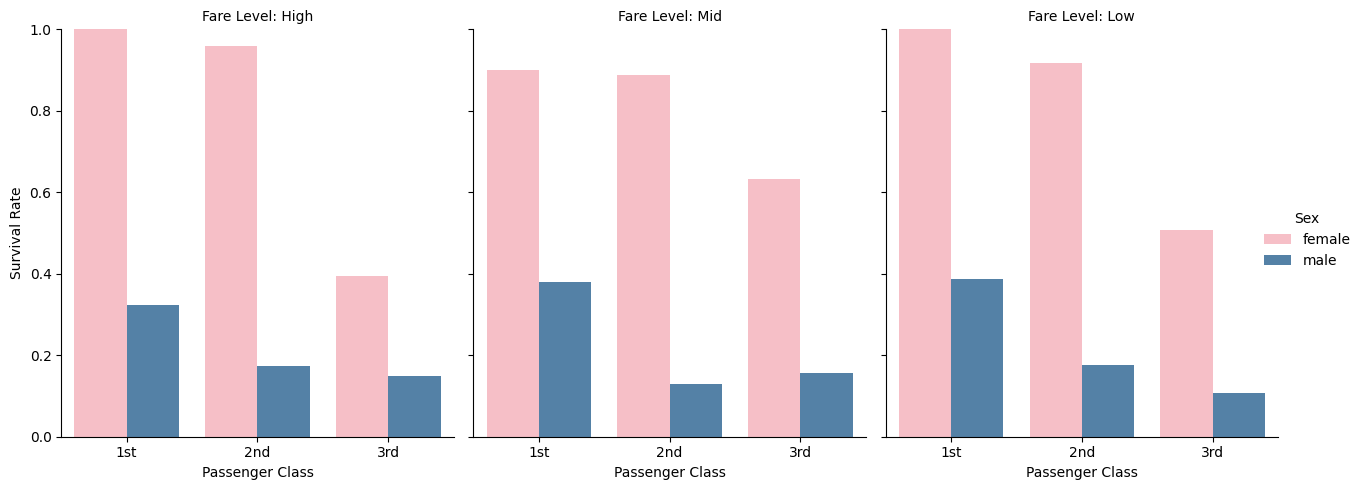

In [92]:
# Calculate average survival rate grouped by Pclass, Fare_Level, and Sex
grouped = df.groupby(['Pclass', 'Fare_Level', 'Sex'])['Survived'].mean().reset_index()

# Create bar plots for each Fare_Level, showing survival rate by Pclass and separated by Sex
g = sns.catplot(
    data=grouped,
    x='Pclass',
    y='Survived',
    hue='Sex',
    col='Fare_Level',
    col_order=['High', 'Mid', 'Low'],
    kind='bar',
    height=5,
    aspect=0.8,
    palette={'female': 'lightpink', 'male': 'steelblue'},
    ci=None
)

# Customize plot appearance
g.set_titles('Fare Level: {col_name}')
g.set_axis_labels('Passenger Class', 'Survival Rate')
g.set(ylim=(0, 1))

# Customize x-axis labels
for ax in g.axes.flatten():
    ax.set_xticklabels(['1st', '2nd', '3rd'])

# Move legend outside the plot
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_loc('center right')

plt.tight_layout()
plt.show()


**All cabin levels have higher survival rates for women.**   
**Cheaper 1st class fares have lower survival rates for women than other cabin levels**

#### Scatter plot (bubble size indicates number of people)

C:\Users\hanay\AppData\Local\Temp\ipykernel_25272\3982777067.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_summary = df.groupby('Fare_Bin').agg(


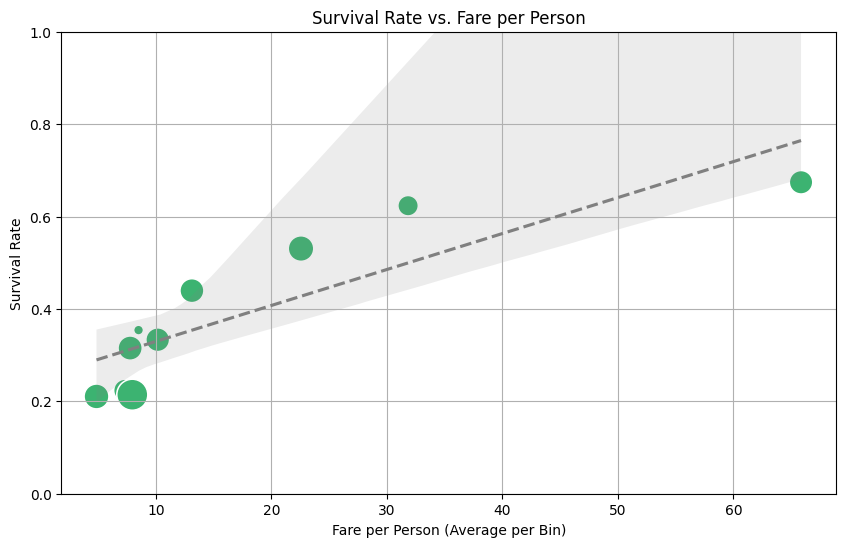

In [98]:
df['Fare_Bin'] = pd.qcut(df['Fare_per_person'], q=10)  

# Calculate survival rate and number of people and format them for graphs
fare_summary = df.groupby('Fare_Bin').agg(
    Survival_Rate=('Survived', 'mean'),
    Count=('Survived', 'size'),
    Fare_Midpoint=('Fare_per_person', lambda x: x.mean())
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=fare_summary,
    x='Fare_Midpoint',
    y='Survival_Rate',
    size='Count',
    sizes=(50, 500),
    color='mediumseagreen',
    legend=False
)

# support line
sns.regplot(
    data=fare_summary,
    x='Fare_Midpoint',
    y='Survival_Rate',
    scatter=False,
    color='gray',
    line_kws={'linestyle': 'dashed'}
)

plt.title('Survival Rate vs. Fare per Person')
plt.xlabel('Fare per Person (Average per Bin)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()



Cheap fares → Low survival rate =     
**Most of the victims were low-income earners in third-class cabins**

#### (Appendix) Logistic regression    

* The relationship between Fare_per_person and survival is reflected in its coefficient.
* Including other variables like Pclass and Sex allows for multivariate analysis.

In [96]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival_Status,Title,Title_Simple,GroupSize,Fare_per_person,Fare_Level,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Dead,Mr,Mr,1,7.2500,Low,"(7.05, 7.733]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Survived,Mrs,Mrs,1,71.2833,High,"(39.4, 221.779]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Survived,Miss,Miss,1,7.9250,Mid,"(7.854, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Survived,Mrs,Mrs,2,26.5500,Low,"(14.5, 26.55]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Dead,Mr,Mr,1,8.0500,High,"(7.854, 8.05]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Dead,Rev,Clergy,1,13.0000,Mid,"(11.725, 14.5]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Survived,Miss,Miss,1,30.0000,Mid,"(26.55, 39.4]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,Dead,Miss,Miss,2,11.7250,High,"(8.85, 11.725]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Survived,Mr,Mr,1,30.0000,Mid,"(26.55, 39.4]"


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# select column
df_model = df[['Survived', 'Fare_per_person', 'Sex', 'Pclass']].dropna()

# Column as Sex make into number（female=0, male=1）
df_model['Sex'] = df_model['Sex'].map({'female': 0, 'male': 1})

# Explanatory variables and response variables
X = df_model[['Fare_per_person', 'Sex', 'Pclass']]
y = df_model['Survived']

# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

# Display the coefficients of the logistic regression model
coefficients = pd.Series(model.coef_[0], index=X.columns)
print("Logistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
Fare_per_person    0.053492
Sex               -1.250133
Pclass            -0.759740
dtype: float64


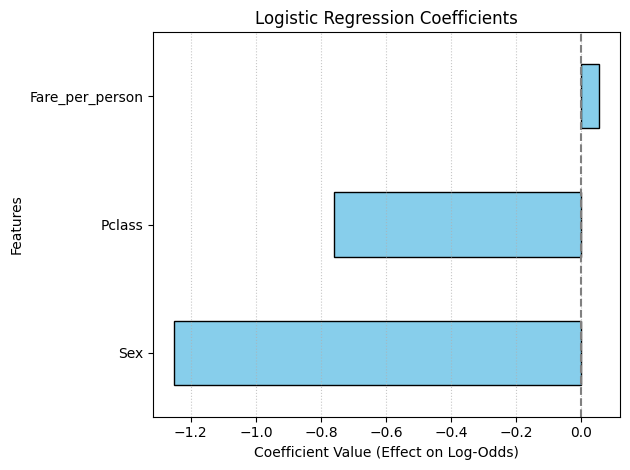

In [100]:
coefficients.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value (Effect on Log-Odds)')
plt.ylabel('Features')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()